<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
dataset=pd.read_csv('/content/bank-full.csv')
dataset.head
dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
       age           "job"   "marital"  "education" "default"

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
dataset.describe

<bound method NDFrame.describe of        age           "job"   "marital"  "education" "default"  "balance"  \
0       58    "management"   "married"   "tertiary"      "no"       2143   
1       44    "technician"    "single"  "secondary"      "no"         29   
2       33  "entrepreneur"   "married"  "secondary"      "no"          2   
3       47   "blue-collar"   "married"    "unknown"      "no"       1506   
4       33       "unknown"    "single"    "unknown"      "no"          1   
...    ...             ...         ...          ...       ...        ...   
45206   51    "technician"   "married"   "tertiary"      "no"        825   
45207   71       "retired"  "divorced"    "primary"      "no"       1729   
45208   72       "retired"   "married"  "secondary"      "no"       5715   
45209   57   "blue-collar"   "married"  "secondary"      "no"        668   
45210   37  "entrepreneur"   "married"  "secondary"      "no"       2971   

      "housing" "loan"    "contact"  "day" "month"  "duration"  "campaign"  \
0         "yes"   "no"    "unknown"      5   "may"         261           1   
1         "yes"   "no"    "unknown"      5   "may"         151           1   
2         "yes"  "yes"    "unknown"      5   "may"          76           1   
3         "yes"   "no"    "unknown"      5   "may"          92           1   
4          "no"   "no"    "unknown"      5   "may"         198           1   
...         ...    ...          ...    ...     ...         ...         ...   
45206      "no"   "no"   "cellular"     17   "nov"         977           3   
45207      "no"   "no"   "cellular"     17   "nov"         456           2   
45208      "no"   "no"   "cellular"     17   "nov"        1127           5   
45209      "no"   "no"  "telephone"     17   "nov"         508           4   
45210      "no"   "no"   "cellular"     17   "nov"         361           2   

       "pdays"  "previous" "poutcome"    "y"  
0           -1           0  "unknown"   "no"  
1           -1           0  "unknown"   "no"  
2           -1           0  "unknown"   "no"  
3           -1           0  "unknown"   "no"  
4           -1           0  "unknown"   "no"  
...        ...         ...        ...    ...  
45206       -1           0  "unknown"  "yes"  
45207       -1           0  "unknown"  "yes"  
45208      184           3  "success"  "yes"  
45209       -1           0  "unknown"   "no"  
45210      188          11    "other"   "no"  

[45211 rows x 17 columns]>

In [4]:
dataset.info

<bound method DataFrame.info of        age           "job"   "marital"  "education" "default"  "balance"  \
0       58    "management"   "married"   "tertiary"      "no"       2143   
1       44    "technician"    "single"  "secondary"      "no"         29   
2       33  "entrepreneur"   "married"  "secondary"      "no"          2   
3       47   "blue-collar"   "married"    "unknown"      "no"       1506   
4       33       "unknown"    "single"    "unknown"      "no"          1   
...    ...             ...         ...          ...       ...        ...   
45206   51    "technician"   "married"   "tertiary"      "no"        825   
45207   71       "retired"  "divorced"    "primary"      "no"       1729   
45208   72       "retired"   "married"  "secondary"      "no"       5715   
45209   57   "blue-collar"   "married"  "secondary"      "no"        668   
45210   37  "entrepreneur"   "married"  "secondary"      "no"       2971   

      "housing" "loan"    "contact"  "day" "month"  "duration"  "campaign"  \
0         "yes"   "no"    "unknown"      5   "may"         261           1   
1         "yes"   "no"    "unknown"      5   "may"         151           1   
2         "yes"  "yes"    "unknown"      5   "may"          76           1   
3         "yes"   "no"    "unknown"      5   "may"          92           1   
4          "no"   "no"    "unknown"      5   "may"         198           1   
...         ...    ...          ...    ...     ...         ...         ...   
45206      "no"   "no"   "cellular"     17   "nov"         977           3   
45207      "no"   "no"   "cellular"     17   "nov"         456           2   
45208      "no"   "no"   "cellular"     17   "nov"        1127           5   
45209      "no"   "no"  "telephone"     17   "nov"         508           4   
45210      "no"   "no"   "cellular"     17   "nov"         361           2   

       "pdays"  "previous" "poutcome"    "y"  
0           -1           0  "unknown"   "no"  
1           -1           0  "unknown"   "no"  
2           -1           0  "unknown"   "no"  
3           -1           0  "unknown"   "no"  
4           -1           0  "unknown"   "no"  
...        ...         ...        ...    ...  
45206       -1           0  "unknown"  "yes"  
45207       -1           0  "unknown"  "yes"  
45208      184           3  "success"  "yes"  
45209       -1           0  "unknown"   "no"  
45210      188          11    "other"   "no"  

[45211 rows x 17 columns]>

In [5]:
print(dataset)

       age           "job"   "marital"  "education" "default"  "balance"  \
0       58    "management"   "married"   "tertiary"      "no"       2143   
1       44    "technician"    "single"  "secondary"      "no"         29   
2       33  "entrepreneur"   "married"  "secondary"      "no"          2   
3       47   "blue-collar"   "married"    "unknown"      "no"       1506   
4       33       "unknown"    "single"    "unknown"      "no"          1   
...    ...             ...         ...          ...       ...        ...   
45206   51    "technician"   "married"   "tertiary"      "no"        825   
45207   71       "retired"  "divorced"    "primary"      "no"       1729   
45208   72       "retired"   "married"  "secondary"      "no"       5715   
45209   57   "blue-collar"   "married"  "secondary"      "no"        668   
45210   37  "entrepreneur"   "married"  "secondary"      "no"       2971   

      "housing" "loan"    "contact"  "day" "month"  "duration"  "campaign"  \
0        

In [6]:
dataset.head()

,age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [7]:
dataset.columns

Index(['age', '"job"', '"marital"', '"education"', '"default"', '"balance"',
       '"housing"', '"loan"', '"contact"', '"day"', '"month"', '"duration"',
       '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"y"'],
      dtype='object')

In [8]:
categorical_cols = ['"job"', '"marital"', '"education"', '"default"','"housing"', '"loan"', '"contact"','"month"', '"poutcome"']

In [9]:
encoded_cols = pd.get_dummies(dataset[categorical_cols], drop_first=True)


In [10]:
data = dataset.drop(columns=categorical_cols)

In [11]:
data = pd.concat([data, encoded_cols], axis=1)

In [12]:
X = data.drop('"y"', axis=1)
y = data['"y"']



In [13]:
X

,age,"""balance""","""day""","""duration""","""campaign""","""pdays""","""previous""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""",...,"""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""poutcome""_""other""","""poutcome""_""success""","""poutcome""_""unknown"""
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [14]:
y

0         "no"
1         "no"
2         "no"
3         "no"
4         "no"
         ...  
45206    "yes"
45207    "yes"
45208    "yes"
45209     "no"
45210     "no"
Name: "y", Length: 45211, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,age,"""balance""","""day""","""duration""","""campaign""","""pdays""","""previous""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""",...,"""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""poutcome""_""other""","""poutcome""_""success""","""poutcome""_""unknown"""
13932,57,658,10,724,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
9894,37,1699,9,63,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
39946,35,2823,2,102,4,96,2,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9217,35,214,5,247,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4124,38,323,19,138,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,35,995,5,39,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
21243,35,750,18,233,12,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42613,35,323,11,261,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
43567,70,616,27,149,2,182,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
X_test

,age,"""balance""","""day""","""duration""","""campaign""","""pdays""","""previous""","""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""",...,"""month""_""jul""","""month""_""jun""","""month""_""mar""","""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""poutcome""_""other""","""poutcome""_""success""","""poutcome""_""unknown"""
14001,37,1403,10,91,15,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32046,36,-253,14,1073,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13318,47,-406,8,243,5,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
42991,57,501,11,105,7,188,2,False,False,True,...,False,False,False,False,False,False,False,False,False,False
14237,33,-406,14,332,2,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,53,252,31,727,4,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
6654,28,1996,28,55,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17106,28,7,25,50,3,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
9025,59,0,5,812,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [17]:
y_train

13932    "yes"
9894      "no"
39946     "no"
9217      "no"
4124      "no"
         ...  
30403     "no"
21243     "no"
42613    "yes"
43567     "no"
2732      "no"
Name: "y", Length: 36168, dtype: object

In [18]:
y_test

14001     "no"
32046    "yes"
13318     "no"
42991     "no"
14237     "no"
         ...  
18448    "yes"
6654      "no"
17106     "no"
9025     "yes"
13171     "no"
Name: "y", Length: 9043, dtype: object

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_test_binary = y_test.replace({'no': 0, 'yes': 1})

In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8987061815769103
Confusion Matrix:
[[7754  226]
 [ 690  373]]


In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [25]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[7754  226]
 [ 690  373]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


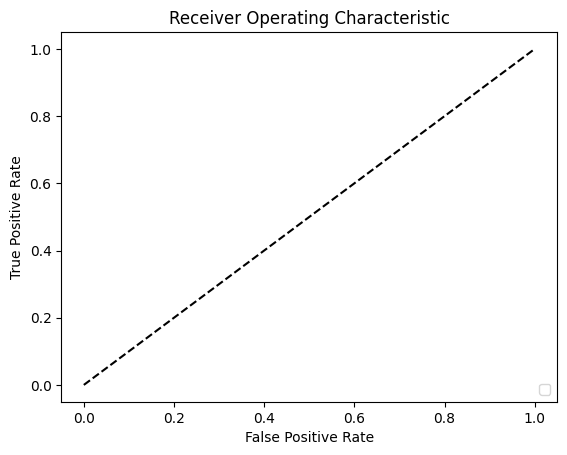

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob, pos_label=1)
# plt.plot(fpr, tpr,color='blue', label='ROC curve (AUC = {:.2f})'.format(auc))
# plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()